# SWMAL Exercise


## Convolutional Neural Networks (CNNs)


Excercise 9 from [HOML], p.496 2nd./p.535 3rd. (slighty modified):

__"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."__

For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.

In [13]:
# Nedenstående er lavet med chat gpt

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0 # Dividerer med 255 for at få pixel-værdier mellem 0-1

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape(target_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.1500 - accuracy: 0.9543 - val_loss: 0.0572 - val_accuracy: 0.9850
Epoch 2/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0476 - accuracy: 0.9854 - val_loss: 0.0492 - val_accuracy: 0.9857
Epoch 3/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0378 - val_accuracy: 0.9903
Epoch 4/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0370 - val_accuracy: 0.9897
Epoch 5/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0421 - val_accuracy: 0.9878
Epoch 6/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0149 - accuracy: 0.9951 - val_loss: 0.0394 - val_accuracy: 0.9907
Epoch 7/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0114 - accuracy: 0.9966 - val_loss: 0.0398 -

313/313 - 1s - loss: 0.0416 - accuracy: 0.9905 - 1s/epoch - 4ms/step


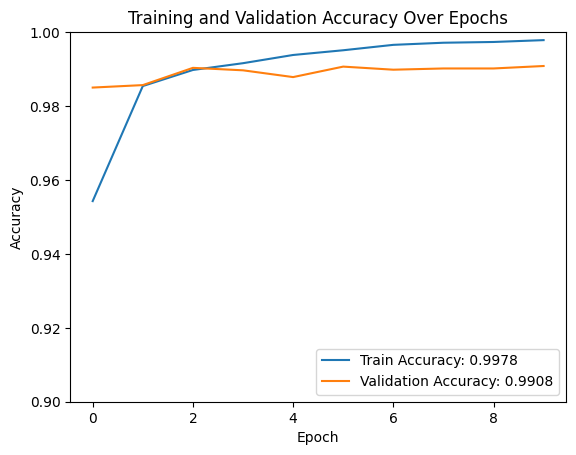

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Plot the learning curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.xticks(np.arange(0, len(history.history['accuracy']), 2))
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy Over Epochs')

final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
plt.legend([f'Train Accuracy: {final_train_accuracy:.4f}', f'Validation Accuracy: {final_val_accuracy:.4f}'], loc='lower right')

plt.show()





In [15]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape(target_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.5134 - accuracy: 0.9318 - val_loss: 0.3690 - val_accuracy: 0.9490
Epoch 2/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.3282 - accuracy: 0.9568 - val_loss: 0.2972 - val_accuracy: 0.9655
Epoch 3/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.2991 - accuracy: 0.9597 - val_loss: 0.2702 - val_accuracy: 0.9702
Epoch 4/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.2779 - accuracy: 0.9622 - val_loss: 0.2794 - val_accuracy: 0.9597
Epoch 5/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.2664 - accuracy: 0.9640 - val_loss: 0.2495 - val_accuracy: 0.9657
Epoch 6/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.2550 - accuracy: 0.9651 - val_loss: 0.2376 - val_accuracy: 0.9718
Epoch 7/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.2450 - accuracy: 0.9664 - val_loss: 0.2472 -

In [17]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape(target_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels))

Epoch 1/30
1688/1688 [==============================] - 16s 9ms/step - loss: 0.5296 - accuracy: 0.9269 - val_loss: 0.3344 - val_accuracy: 0.9618
Epoch 2/30
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3299 - accuracy: 0.9563 - val_loss: 0.2964 - val_accuracy: 0.9652
Epoch 3/30
1688/1688 [==============================] - 26s 15ms/step - loss: 0.2942 - accuracy: 0.9607 - val_loss: 0.2680 - val_accuracy: 0.9673
Epoch 4/30
1688/1688 [==============================] - 27s 16ms/step - loss: 0.2747 - accuracy: 0.9628 - val_loss: 0.2598 - val_accuracy: 0.9660
Epoch 5/30
1688/1688 [==============================] - 21s 12ms/step - loss: 0.2604 - accuracy: 0.9648 - val_loss: 0.2570 - val_accuracy: 0.9648
Epoch 6/30
1688/1688 [==============================] - 19s 11ms/step - loss: 0.2485 - accuracy: 0.9650 - val_loss: 0.2260 - val_accuracy: 0.9737
Epoch 7/30
1688/1688 [==============================] - 18s 11ms/step - loss: 0.2416 - accuracy: 0.9661 - val_loss: 0.2739 - 

In [19]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape(target_shape=(28, 28, 1)),
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2955 - accuracy: 0.9352 - val_loss: 0.1557 - val_accuracy: 0.9785
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1474 - accuracy: 0.9768 - val_loss: 0.1415 - val_accuracy: 0.9777
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1271 - accuracy: 0.9800 - val_loss: 0.1223 - val_accuracy: 0.9818
Epoch 4/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1180 - accuracy: 0.9812 - val_loss: 0.1177 - val_accuracy: 0.9833
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1099 - accuracy: 0.9839 - val_loss: 0.1108 - val_accuracy: 0.9843
Epoch 6/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1053 - accuracy: 0.9845 - val_loss: 0.1073 - val_accuracy: 0.9832
Epoch 7/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.1030 - accuracy: 0.9858 - val_loss: 0.1051 - val_ac

313/313 - 1s - loss: 0.0950 - accuracy: 0.9857 - 802ms/epoch - 3ms/step


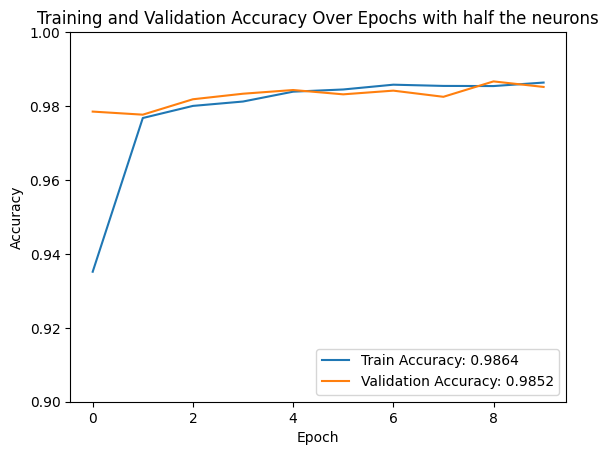

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Plot the learning curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.xticks(np.arange(0, len(history.history['accuracy']), 2))
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy Over Epochs with half the neurons')

final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
plt.legend([f'Train Accuracy: {final_train_accuracy:.4f}', f'Validation Accuracy: {final_val_accuracy:.4f}'], loc='lower right')

plt.show()

REVISIONS||
:- | :- |
2021-10-20| CEF, initial version, clone from [HOML].
2021-10-26| CEF, added learning curve item.
2022-01-25| CEF, update to SWMAL F22.
2023-03-08| CEF, updated page no to HOML 3rd. ed., updated to SWMAL F23.
2023-03-15| CEF, removed wording "from scratch", replaced with "via the Keras API" and added comment about references.